In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('data/energy-consumption.csv')

df.head(10)

,category,type,name,date,time,energy
0,commercial,StripMall,TX_HOUSTON,2004-01-02,00:00,15.106999
1,commercial,StripMall,TX_HOUSTON,2004-01-02,01:00,15.106999
2,commercial,StripMall,TX_HOUSTON,2004-01-02,02:00,15.106999
3,commercial,StripMall,TX_HOUSTON,2004-01-02,03:00,15.106999
4,commercial,StripMall,TX_HOUSTON,2004-01-02,04:00,15.106999
5,commercial,StripMall,TX_HOUSTON,2004-01-02,05:00,15.106999
6,commercial,StripMall,TX_HOUSTON,2004-01-02,06:00,24.396885
7,commercial,StripMall,TX_HOUSTON,2004-01-02,07:00,25.925035
8,commercial,StripMall,TX_HOUSTON,2004-01-02,08:00,33.824998
9,commercial,StripMall,TX_HOUSTON,2004-01-02,09:00,50.217275


<AxesSubplot:xlabel='time'>

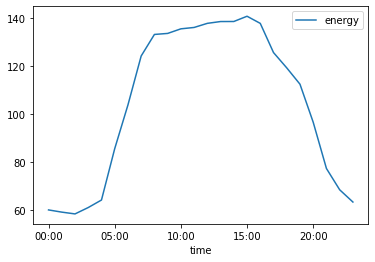

In [72]:
%matplotlib inline
df.groupby(['time'])[[ 'energy']].mean().plot(kind = 'line')

In [35]:
df.query('name == "TX_HOUSTON"').type.unique()

array(['StripMall', 'FullServiceRestaurant', 'SecondarySchool',
       'PrimarySchool', 'SmallOffice', 'SuperMarket', 'Stand-aloneRetail',
       'LargeOffice', 'SmallHotel', 'LargeHotel', 'Hospital',
       'MidriseApartment', 'Warehouse', 'MediumOffice',
       'QuickServiceRestaurant', 'OutPatient'], dtype=object)

In [61]:
%matplotlib auto 
df_tmp = df.query("name =='TX_HOUSTON' & type == 'LargeHotel' ")


df_tmp.loc[:, 'dt'] = pd.to_datetime(df_tmp['date'] + ' ' + df_tmp['time'])
df_tmp.set_index('dt', inplace=True)
df_tmp = df_tmp.drop(['date', 'time'], axis=1)
df_tmp = df_tmp.resample('1H').sum()



fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(df_tmp['energy'], label='All data', lw=1, color = 'C0', alpha = 0.3)
ax.plot(
        df_tmp['energy'].rolling(24).mean(), color='C1',
        label='1 week  mean', zorder=3, alpha = 0.8, lw = 5,
        )
ax.legend()
ax.set_ylabel('Energy consumption (MWs)')
ax.set_xlabel('Date')
plt.xticks(rotation=45)
#make vertical line at 2004-02-01
plt.axvline(x=pd.to_datetime('2004-02-01'), color='k', linestyle='--', alpha = 0.5)


plt.show()

Using matplotlib backend: MacOSX


/var/folders/1c/qqdm58sj5mjfk3xjz79fxzph0000gn/T/ipykernel_32136/509676435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.loc[:, 'dt'] = pd.to_datetime(df_tmp['date'] + ' ' + df_tmp['time'])


In [24]:
df_tmp = df.query("name =='NM_ALBUQUERQUE' & type == 'PrimarySchool' ")


df_tmp.loc[:, 'dt'] = pd.to_datetime(df_tmp['date'] + ' ' + df_tmp['time'])
df_tmp.set_index('dt', inplace=True)
df_tmp = df_tmp.drop(['date', 'time'], axis=1)
df_tmp = df_tmp.resample('1H').sum()
df_tmp

/var/folders/1c/qqdm58sj5mjfk3xjz79fxzph0000gn/T/ipykernel_32136/3008154587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.loc[:, 'dt'] = pd.to_datetime(df_tmp['date'] + ' ' + df_tmp['time'])


,energy
dt,
2004-01-01 00:00:00,55.684136
2004-01-01 01:00:00,56.974586
2004-01-01 02:00:00,56.647888
2004-01-01 03:00:00,58.073657
2004-01-01 04:00:00,58.098963
...,...
2004-12-31 19:00:00,55.640988
2004-12-31 20:00:00,55.623017
2004-12-31 21:00:00,56.479010


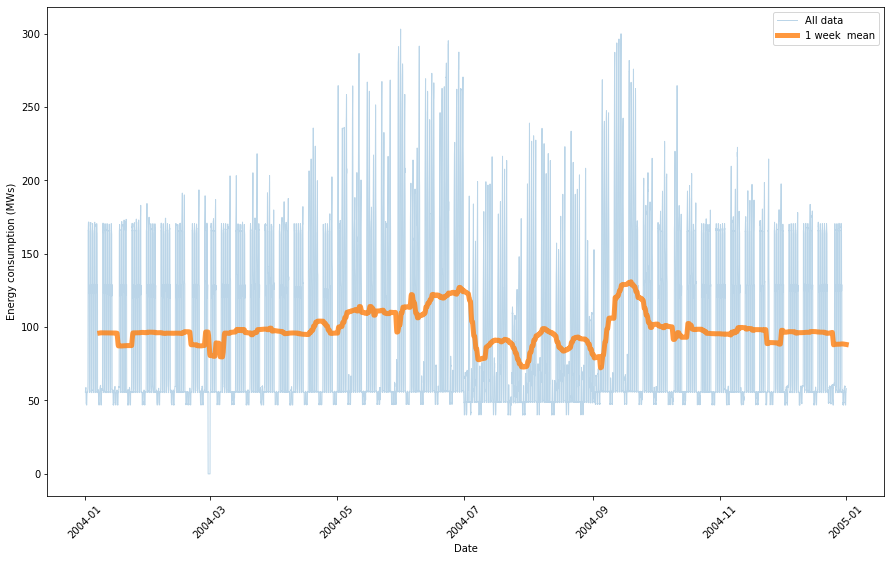

In [25]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(df_tmp['energy'], label='All data', lw=1, color = 'C0', alpha = 0.3)
ax.plot(
        df_tmp['energy'].rolling(24*7).mean(), color='C1',
        label='1 week  mean', zorder=3, alpha = 0.8, lw = 5,
        )
ax.legend()
ax.set_ylabel('Energy consumption (MWs)')
ax.set_xlabel('Date')
plt.xticks(rotation=45)


plt.show()

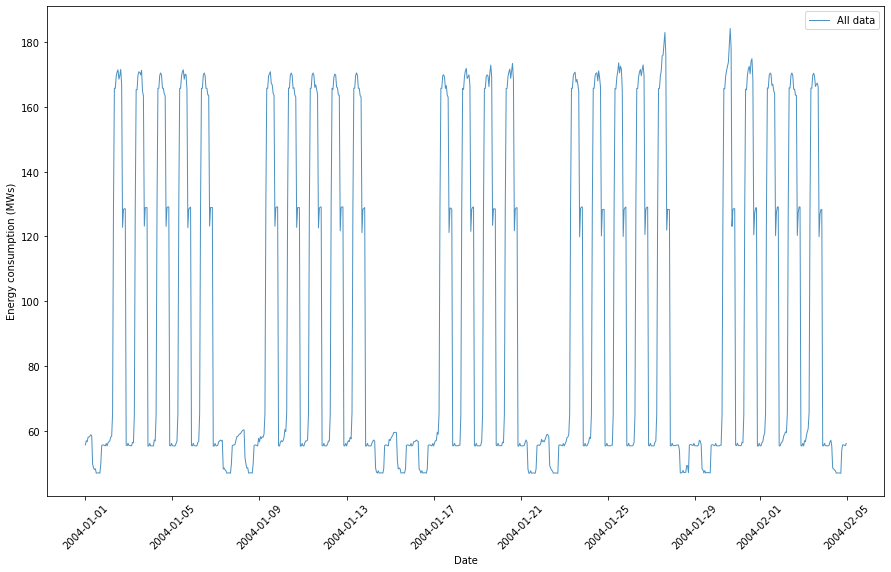

In [34]:
fig, ax = plt.subplots(figsize=(15, 9))
#ax.plot(df_tmp['energy'].tail(24*7*2), label='All data', lw=1, color = 'C0', alpha = 0.8)
ax.plot(df_tmp['energy'].head(24*7*5), label='All data', lw=1, color = 'C0', alpha = 0.8)
ax.legend()
ax.set_ylabel('Energy consumption (MWs)')
ax.set_xlabel('Date')
plt.xticks(rotation=45)


plt.show()

In [4]:
df.query("name =='NM_ALBUQUERQUE'")[['category', 'type']].value_counts()

category    type                  
commercial  FullServiceRestaurant     8760
            Hospital                  8760
            LargeHotel                8760
            LargeOffice               8760
            MediumOffice              8760
            MidriseApartment          8760
            OutPatient                8760
            PrimarySchool             8760
            QuickServiceRestaurant    8760
            SecondarySchool           8760
            SmallHotel                8760
            SmallOffice               8760
            Stand-aloneRetail         8760
            StripMall                 8760
            SuperMarket               8760
            Warehouse                 8760
dtype: int64

In [32]:
df[['category', 'type']].value_counts()

category     type                  
residential  residential               2076120
commercial   SecondarySchool            140160
             Warehouse                  140160
             SuperMarket                140160
             StripMall                  140160
             Stand-aloneRetail          140160
             SmallOffice                140160
             SmallHotel                 140160
             FullServiceRestaurant      140160
             Hospital                   140160
             PrimarySchool              140160
             OutPatient                 140160
             MidriseApartment           140160
             MediumOffice               140160
             LargeOffice                140160
             LargeHotel                 140160
             QuickServiceRestaurant     140160
dtype: int64

In [75]:
df2 = pd.read_csv('data/hourly1418_energy_temp_PV.csv')
df2['Dates'] = pd.to_datetime(df2['Dates'])
df2.set_index('Dates', inplace=True)
df2 = df2.resample('1H').sum()

df2.head()

,SDGE,year,month,day,hour,holiday,STATION,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature,AC_kW,cum_AC_kW
Dates,,,,,,,,,,,,
2014-01-01 00:00:00,2096.0,2014,1,1,0,1,72290023188,0.0,7.0,51.0,0.0,220992.227
2014-01-01 01:00:00,1986.0,2014,1,1,1,1,72290023188,0.0,7.0,51.5,0.0,220992.227
2014-01-01 02:00:00,1936.0,2014,1,1,2,1,72290023188,0.0,7.0,51.8,0.0,220992.227
2014-01-01 03:00:00,1896.0,2014,1,1,3,1,72290023188,0.0,7.0,50.0,0.0,220992.227
2014-01-01 04:00:00,1899.0,2014,1,1,4,1,72290023188,0.0,7.0,48.8,0.0,220992.227


In [79]:

%matplotlib auto

fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(df2['SDGE'], label='All data', lw=1, color = 'C0', alpha = 0.3)
ax.plot(
        df2['SDGE'].rolling(24).mean(), color='C1',
        label='1 day  mean', zorder=3, alpha = 0.8, lw = 5,
        )
ax.legend()
ax.set_ylabel('Energy consumption (MWs)')
ax.set_xlabel('Date')
plt.xticks(rotation=45)


plt.show()

Using matplotlib backend: MacOSX
